# **5. 지도학습 회귀**

지도학습 문제는 회귀와 분류로 나눌 수 있으며, 회귀는 입력에 대해 연속적인 값을 대응시키는 것이고, 분류는 입력에 대해 순서가 없는 클래스(라벨)에 대응시키는 것.

# **5.1 1차원 입력 직선 모델**

16명의 나이와 몸무게로 인공데이터를 만들고, n개의 인덱스로, 모든 데이터를 정리 한 x를 '입력데이터' t를 '목표데이터'라고 부르기로 합니다.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(seed = 1)
X_min = 4
X_max = 30
X_n = 16 #명 수
X = 5 + 25 * np.random.rand(X_n)
Prm_c = [170, 108, 0.2] #생성 매개 함수
T = Prm_c[0] - Prm_c[1] * np.exp(-Prm_c[2] * X) + 4 * np.random.randn(X_n) #예측 함수
np.savez('ch5_data.npz', X = X, X_min = X_min, X_max = X_max, X_n = X_n, T = T) #numpy 배열 값

print(X)

[15.42555012 23.00811234  5.00285937 12.55831432  8.66889727  7.30846487
  9.65650528 13.63901818 14.91918686 18.47041835 15.47986286 22.13048751
 10.11130624 26.95293591  5.68468983 21.76168775]


In [ ]:
print(np.round(X, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]


In [ ]:
print(np.round(T, 2))

[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


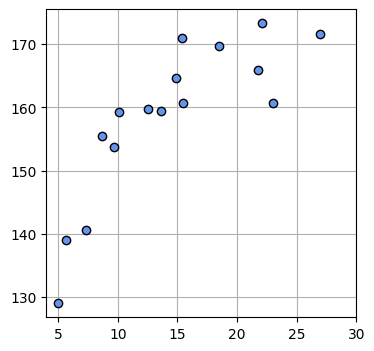

In [ ]:
plt.figure(figsize = (4, 4))
plt.plot(X, T, marker = 'o', linestyle = 'None', markeredgecolor = 'black', color = 'cornflowerblue')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

# **5.1.1 직선 모델**

플롯을 보면 데이터가 고르지 않기 때문에, 새로운 나이 데이터에 정확히 맞추기는 불가능하나, 어느정도의 오차를 감안한다면, 직선을 그려, 새로운 값을 예측하는 것이 가능합니다. 즉 직선 모델(선형 직선 모델) $y(x) = w_0x + w_1$ 로 예측을 한 번 해보자

# **5.1.2 제곱 오차 함수**

'데이터에 부합하도록' 오차 J를 정의하자. $J = \frac{1}{N}\sum\limits_{n=0}^{N-1}(y_n - t_n)^2 $ 로 오차를 설정하고 여기서 $y_n$은 직선모델에 $X_n$을 넣었을 때의 값을 의미한다. 이건 평균제곱오차라는 오차함수다.

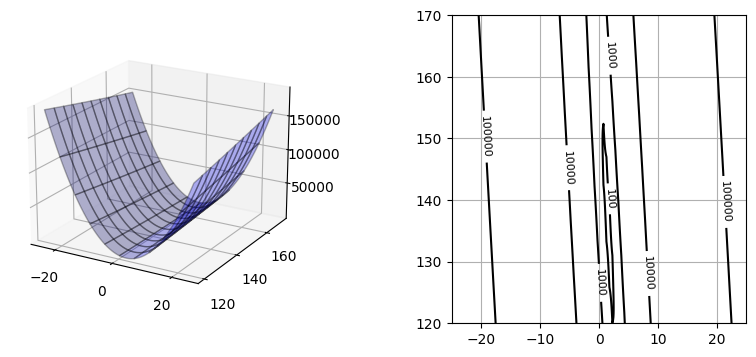

In [ ]:
from mpl_toolkits.mplot3d import axes3d

def mse_line(x, t, w):
  y = w[0] * x + w[1]
  mse = np.mean((y - t) ** 2)
  return mse

xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((xn, xn))


for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, [x0[i0], x1[i1]])

plt.figure(figsize = (9.5, 4))
plt.subplots_adjust(wspace = 0.5)

ax = plt.subplot(1, 2, 1, projection = '3d')
ax.plot_surface(xx0, xx1, J, rstride = 10, cstride = 10, alpha = 0.3, color = 'blue', edgecolor = 'black')
ax.set_xticks([-20, 0, 20])
ax.set_yticks([120, 140, 160])
ax.view_init(20, -60)

plt.subplot(1, 2, 2)
cont = plt.contour(xx0, xx1, J, 30, colors = 'black', levels = [100, 1000, 10000, 100000])
cont.clabel(fmt = '%1.0f', fontsize = 8)
plt.grid(True)
plt.show()



# **5.13 매개 변수 구하기(경사 하강법)**

J 즉 손실함수가 작아지게 하는 매개변수 $w_0 와 w_1$을 구하는 방법은 경사하강법이다.

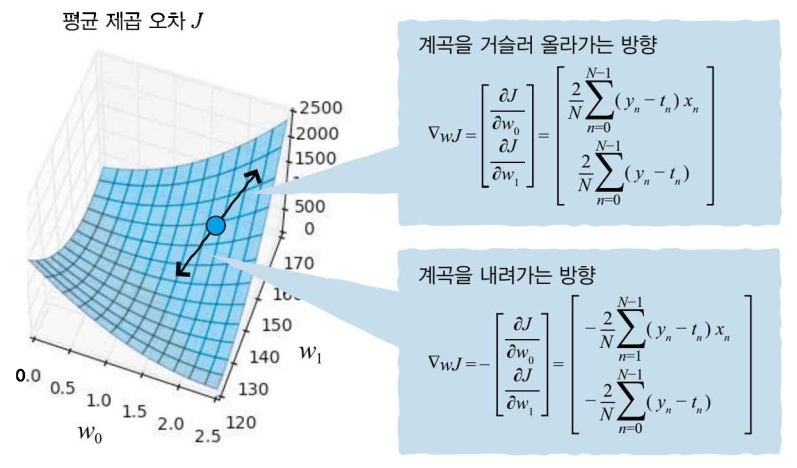

경사는 이전에 말한바와 같이 각각의 편미분 값을 벡터로 늘어놓은 것이고, 경사를 따라가다 보면 결국 최대점에 도달하게 된다. 그래서 경사에 -를 붙이게 되면, 경사가 최소점을 향하게 될 것이다.이 경사를 J의 기울기라고 부르며,∇wJ 로 부르게 된다. 즉 경사하강법은 각 변수에 대해, 편미분한 값으로 계속해서 빼가며, 업데이트 해주는 것을 말한다.

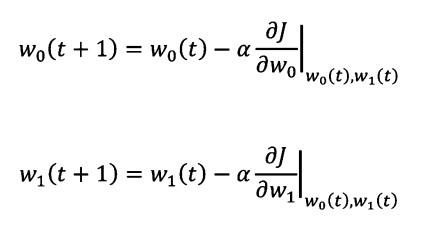

In [ ]:
def dmse_line(x, t, w):
  y = w[0] * x + w[1]
  d_w0 = 2 * np.mean((y-t) * x)
  d_w1 = 2 * np.mean(y - t)
  return d_w0, d_w1

In [ ]:
d_w = dmse_line(X, T, [10, 165])
print(np.round(d_w, 1))

[5046.3  301.8]


차례로 $w_0 방향과\, w_1 \, 방향의\, 기울기를\, 나타냅니다 즉 오차함수의 기울기 값(편미분 값)을 return 합니다.$ 이후 아래에서는 경사하강법을 통한 기울기를 도출하는 함수를 만들어 냅니다.

In [ ]:
def fit_line_num(x, t):
  w_init = [10.0, 165.0]
  alpha = 0.001
  i_max = 100000
  eps = 0.1
  w_i = np.zeros([i_max, 2])
  w_i[0, :] = w_init
  for i in range(1, i_max):
    dmse = dmse_line(x, t, w_i[i - 1])
    w_i[i, 0] = w_i[i - 1, 0] - alpha * dmse[0]
    w_i[i, 1] = w_i[i - 1, 1] - alpha * dmse[1]
    if max(np.absolute(dmse)) < eps:#배열의 각 요소에 대한 절대값.
      break;

  w0 = w_i[i, 0] #scope 밖에서도 접근이 가능하다.
  w1 = w_i[i, 1]
  w_i = w_i[:i, :] #지금까지 저장해두었던 값들
  return w0, w1, dmse, w_i

반복횟수 13820.
W = 1.539947, 136.176160
dMSE = [-0.005794, 0.099991]
MSE = 49.027452


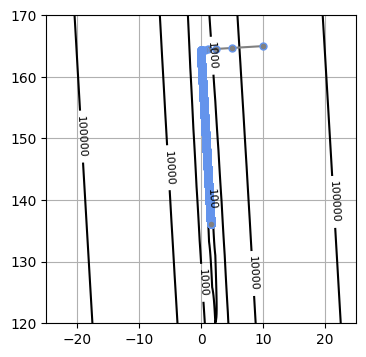

In [ ]:
plt.figure(figsize = (4, 4))
xn = 100
w0_range = [-25, 25]
w1_range = [120, 170]
x0 = np.linspace(w0_range[0], w0_range[1], xn)
x1 = np.linspace(w1_range[0], w1_range[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
J = np.zeros((len(x0), len(x1)))
for i0 in range(xn):
  for i1 in range(xn):
    J[i1, i0] = mse_line(X, T, (x0[i0], x1[i1]))

cont = plt.contour(xx0, xx1, J, 30, colors = 'black', levels = (100, 1000, 10000, 100000))
cont.clabel(fmt = '%1.0f', fontsize = 8)
plt.grid(True)
#경사하강법 호출
W0, W1, dMSE, W_history = fit_line_num(X, T)

print('반복횟수 {0}.'.format(W_history.shape[0]))
print('W = {0:.6f}, {1:.6f}'.format(W0, W1))
print('dMSE = [{0:.6f}, {1:.6f}]'.format(dMSE[0], dMSE[1]))
print('MSE = {0:.6f}'.format(mse_line(X, T, (W0, W1))))
plt.plot(W_history[:,0], W_history[:,1], '.-', color = 'gray', markersize=10, markeredgecolor = 'cornflowerblue')
plt.show()

w0 = 1.540, w1 = 136.176
SD = 7.002 cm


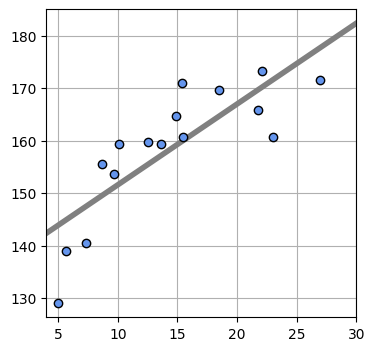

In [ ]:
def show_line(w):
  xb = np.linspace(X_min, X_max, 100)
  y = w[0] * xb + w[1]
  plt.plot(xb, y, color = (.5, .5, .5), linewidth = 4)

plt.figure(figsize = (4,4))
W = np.array([W0, W1])
mse = mse_line(X, T, W)
print("w0 = {0:.3f}, w1 = {1:.3f}".format(W0, W1))
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
show_line(W)
plt.plot(X, T, marker='o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

완벽히 일치하지는 않지만, 일반적으로, 7cm 내외의 오차를 포기하면 일치하는 직선을 얻을 수 있다. 여기서 오차함수는 이차함수이기 때문에, 언제나 최솟값임을 보장하지만, 더 복잡한 함수에서는 최솟값이 아닌 극솟값이 되게 된다.

# **5.1.4 선형 모델 매개 변수의 해석해**

이처럼 반복을 통해 풀어낸 해를 수치해라고 하고, 직선 모델의 경우는 사실 방정식의 해결을 통한 해석해로 정확한 해를 구할 수 있다. 해석해를 이용하면 반복없이 수치적인 계산으로 최적의 w를 구할 수 있다.

$<>로 평균을 나타낸다.$

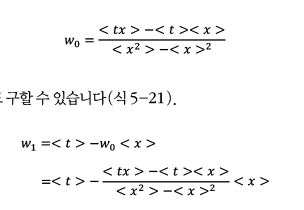

In [ ]:
def fit_line(x, t):
  mx = np.mean(x)
  mt = np.mean(t)
  mtx = np.mean(t * x)
  mxx = np.mean(x * x)
  w0 = (mtx - mt * mx) / (mxx - mx ** 2)
  w1 = mt - w0 * mx
  return ([w0, w1])

w0 = 1.558, w1 = 135.872
SD = 7.001 cm


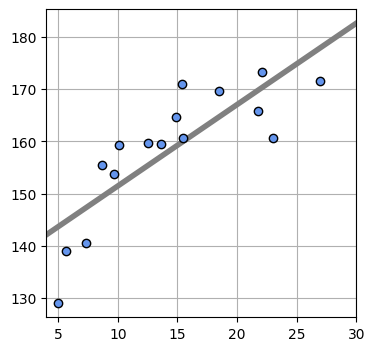

In [ ]:
W = fit_line(X, T)
print("w0 = {0:.3f}, w1 = {1:.3f}".format(W[0], W[1]))
mse = mse_line(X, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.figure(figsize = (4, 4))
show_line(W)
plt.plot(X, T, marker = 'o', linestyle='None', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
plt.show()

좀 더 정확하긴 한데, 유의미한 차이는 없다.

# **5.2 2차원 입력면 모델**

입력이 2차원인 경우, $X = (X_0, X_1)$ 에 화장한다. 1차원의 경우 나이만을 이용했지만, 이제 나이와 몸무게로 키를 예측한다. 체질량 지수 23으로 가정하여 다음 식을 사용한다.
몸무게 = $23 \times \frac{키^2}{100} + 노이즈$ 몸무게는 키의 제곱에 비례한다는 단순한 식으로 이를 통해 예측해보고자 한다.

In [ ]:
X0 = X
X0_min = 5
X0_max = 30
np.random.seed(seed = 1)
X1 = 23 * (T / 100) ** 2 + 2 * np.random.randn(X_n)
X1_min = 40
X1_max = 75

In [ ]:
print(np.round(X0, 2))
print(np.round(X1, 2))
print(np.round(T, 2))

[15.43 23.01  5.   12.56  8.67  7.31  9.66 13.64 14.92 18.47 15.48 22.13
 10.11 26.95  5.68 21.76]
[70.43 58.15 37.22 56.51 57.32 40.84 57.79 56.94 63.03 65.69 62.33 64.95
 57.73 66.89 46.68 61.08]
[170.91 160.68 129.   159.7  155.46 140.56 153.65 159.43 164.7  169.65
 160.71 173.29 159.31 171.52 138.96 165.87]


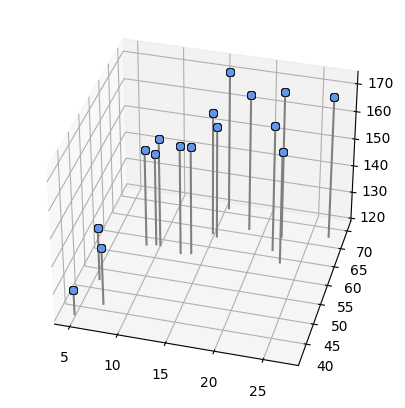

In [ ]:
def show_data2(ax, x0, x1, t):
  for i in range(len(x0)):
    ax.plot([x0[i], x0[i]], [x1[i], x1[i]], [120, t[i]], color = 'gray')
    ax.plot(x0, x1, t, 'o', color = 'cornflowerblue', markeredgecolor = 'black', markersize = 6, markeredgewidth = 0.5)
    ax.view_init(elev = 35, azim = -75)

plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')
show_data2(ax, X0, X1, T)
plt.show()

# **5.2.1 데이터 표시 방법**

데이터 번호는 'n' 벡터의 요소는 'm' 으로 나타내도록 한다. 데이터 번호 'n' 과 벡터의 요소 'm'을 통해 $x_{nm}$ 으로 나타내기로 한다.  

# **5.2.2 면 모델**
N개의 2차원 벡터 $X_n$ 에 대해, 각각 $t_n$이 할당되어 있어, 이 관계를 보기 위해서는 각 축에 $X_{m = 0} 과 X_{m = 1} 그리고, $t$를 나타내는 3차원 플롯이 편리하다. 여기에 선이 아닌 면을 적용하면, 새로운 X 에 대한 예측이 가능하다.

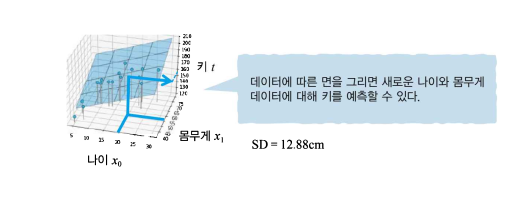

SD = 12.876 cm


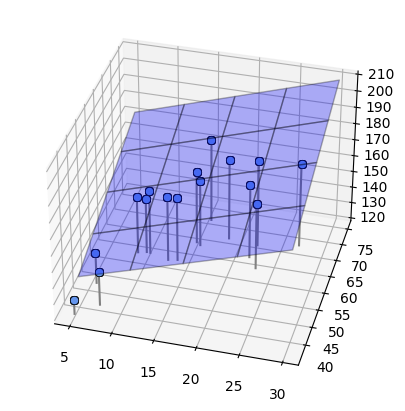

In [ ]:
def show_plane(ax, w):
  px0 = np.linspace(X0_min, X0_max, 5)
  px1 = np.linspace(X1_min, X1_max, 5)
  px0, px1 = np.meshgrid(px0, px1)
  y = w[0]*px0 + w[1] * px1 + w[2]
  ax.plot_surface(px0, px1, y, rstride = 1, cstride = 1, alpha = 0.3, color = 'blue', edgecolor = 'black')

def mse_plane(x0, x1, t, w):
  y = w[0] * x0 + w[1] * x1 + w[2]
  mse = np.mean((y-t)**2)
  return mse

plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')
W = [1.5, 1, 90]
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.show()

# **5.2.3 매개 변수의 해석해**

데이터의 가장 적합한 $w = [w_0, w_1, w_2]$ 를 구해보자. 2차원 면 모델의 경우 1차원 선 모델과 마찬가지로 평균 제곱 오차를 정의할 수 있고, 아래와 같이 var과 cov를 정의한다고 했을 때,w0, w1, w2의 미분 값은 다음과 같다.

Screenshot from 2024-07-09 12-53-26.png

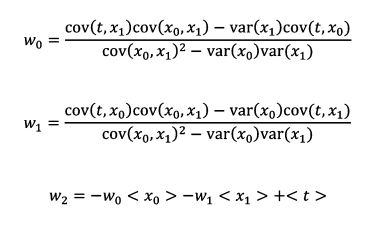

In [ ]:
def fit_plane(x0, x1, t):
  c_tx0 = np.mean(t * x0) - np.mean(t) * np.mean(x0)
  c_tx1 = np.mean(t * x1) - np.mean(t) * np.mean(x1)
  c_x0x1 = np.mean(x0*x1) - np.mean(x0) * np.mean(x1)
  v_x0 = np.var(x0)
  v_x1 = np.var(x1)
  w0 = (c_tx1 * c_x0x1 - v_x1 * c_tx0) / (c_x0x1**2 - v_x0 * v_x1)
  w1 = (c_tx0 * c_x0x1 - v_x0 * c_tx1) / (c_x0x1**2 - v_x0 * v_x1)
  w2 = -w0 * np.mean(x0) - w1 * np.mean(x1) + np.mean(t)
  return np.array([w0, w1, w2])

w0 = 0.5, w1 = 1.1, w2 = 89.0
SD = 2.546 cm


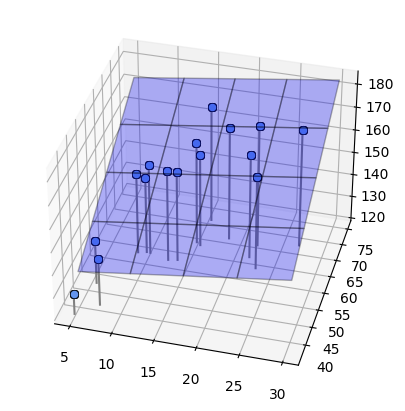

In [ ]:
plt.figure(figsize = (6, 5))
ax = plt.subplot(1, 1, 1, projection = '3d')
W = fit_plane(X0, X1, T)
print("w0 = {0:.1f}, w1 = {1:.1f}, w2 = {2:.1f}".format(W[0], W[1], W[2]))
show_plane(ax, W)
show_data2(ax, X0, X1, T)
mse = mse_plane(X0, X1, T, W)
print("SD = {0:.3f} cm".format(np.sqrt(mse)))
plt.show()

오차가 이전 선 모델에 비해 적어졌다. 이를 통해 알 수 있는 것이 입력 데이터 차원이 클 수록 즉 나이 정보 뿐 아니라, 키와 몸무게 정보까지 받았을 때, 더 좋은 예측 정확도를 가진다는 것이다.

# **5.3 D차원 선형 회귀 모델**

그렇다면, X가 3차원 4차원 혹은 더 큰 모델일 때, 정의 하는 방법은 뭐가 있을까? 고 차원에 대한 모든 공식을 고려하는 것은 너무 힘든 일이다. 잘 견뎌보자.


# **5.3.1 D차원 선형 회귀 모델**

1차원 2차원에 대해 다룬 모델은 모두 선형 회귀 모델이라는 같은 종류의 모델이다. 일반적으로 아래 식과 같다.
$y(x) = w_0x_0 + w_1x_1 + ⋅⋅⋅ + w_{D-1}x_{D-1} + w_D$
$w_D$는 절편을 나타내는 것이다. 이제 절편을 제외하고 생각해 볼건데, 절편이 없다면, $x$에 모두 0을 넣으면, y는 0이 되기 때문에, 이 모델은 어떤 w더라도 원점을 지나는 평면이 되게 된다. 여기까지는 어렵지 않다. 이 모델을 행렬 표기법을 통해 나타내게 된다면, 변수부, 미지수부로 나눌 수 있고, 아래의 그림과 같게 된다.

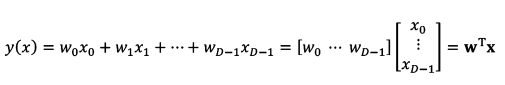

# **5.3.2 매개 변수의 해석해**

이제 부터 해석해를 구한다. 즉 이것을 미분을 해보겠다는 말이다. 평균 제곱 오차해를 이용한다고 가정하면, 아래와 같은 식이 된다. 우리가 구할 것은 지금 최적의 w를 구하고 싶은 것이기 때문에, w에 대해서 미분을 할 것이다.

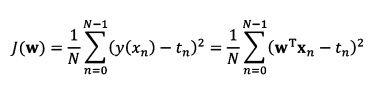

이제 연쇄 법칙을 통해 $w_i$로 미분한다고 하면, 아래의 식과 같게 된다.

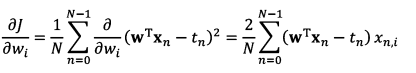

위와 같은 식이 되는데, 이 식을 J를 최소로 만드는 w는 모든 $w_i$ 방향에 대한 기울기가 0 인, 즉 편미분이 0이 되어야 한다. 즉 D개의 연립 방정식을 각 $w_i$ 에 대해 풀면 해석해를 얻을 수 있게 된다. 라는 것. 우선 양변에 대해 $\frac{2}{N}$ 가 없다고 생각하고, 수행한다고 생각하면, $\sum\limits_{n = 0}^{N - 1}(w^Tx_n - t_n)x_{n,i} = 0$ 을 만족해야 한다. D에 대한 구체적인 명명 없이 D 이라는 상수 자체에 대해서 미분을 구하는 것이 가능할까? 행렬을 사용하게 되면, 이게 가능하게 되는데, p(195~198)의 과정을 거치면 다음과 같이 $w = (X^TX)^{-1}X^Tt$ 가 된다. 무어-펜로즈의 의사 역행렬이라는 이름이 붙어 있다. 정방행렬이 아닌 행렬도 무어-펜로즈의 역행렬은 될 수 있다.

# **5.3.3 원점을 지나지 않는 면에 대한 확장**

앞서 그린 예시에서는, 원점을 지나지 않는 즉 y절편의 값이 존재하지 않는다고 생각하고, 미분을 풀었지만, 이렇게 되면 매번 원점을 지나는 그래프 밖에 그릴 수 없게 된다. 그래서, y절편을 추가하게 되는데,

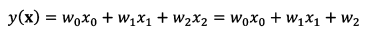

위와 같이 x에 차원 1개를 추가하고, 매번 1을 넣어주게 되면서, y절편을 구현한다. y절편인데 굳이 x에 차원을 넣어줘야 해? 라는 생각을 할 수 있지만, 만일 이렇게 구현하지 않는다고 하면, 문제가 발생하는게, y절편에 대한 학습이 불가능하게 되기 때문에 x에 차원을 추가해 주는 것이다.

# **5.4 선형 기저 함수 모델**

x가 1차원인 경우로 다시 돌아가서, 곡선인 모델을 나타낸다고 생각해보자. 직선보다 더 좋은 모델함수가 될 수 있다. 범용성이 높은 선형 기저 함수에 대해 알아볼텐데, 기저 함수란, 가우스 함수를 기저 함수로 생각한 선형 기저 함수 모델을 생각할 것이다.

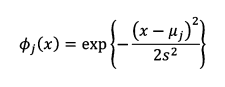

위가 가우스 선형기저 함수고 모델의 x를 다양한 선형 기저 함수 Φ로 대체해 만드는 것이 선형 기저 함수 모델이다.

<ipython-input-48-f955f0490750>:26: MatplotlibDeprecationWarning: Passing the emit parameter of set_ylim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.ylim(0, 1,2)


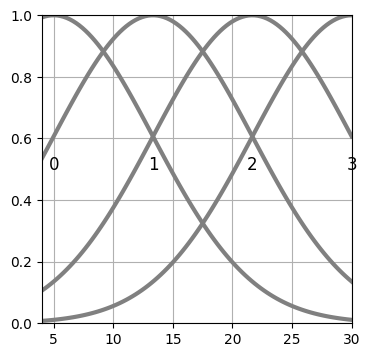

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

outfile = np.load('ch5_data.npz')
X = outfile['X']
X_min = outfile['X_min']
X_max = outfile['X_max']
X_n = outfile['X_n']
T = outfile['T']

def gauss(x, mu, s):
  return np.exp(-(x-mu)**2/(2*s**2))

M = 4
plt.figure(figsize = (4, 4))
mu = np.linspace(5, 30, M)
s = mu[1] - mu[0]
xb = np.linspace(X_min, X_max, 100)
for j in range(M):
  y = gauss(xb, mu[j], s)
  plt.plot(xb, y, color = 'gray', linewidth = 3)
  plt.text(mu[j], 0.5, str(j), fontsize=12, ha='center')  # 각 Gaussian 함수의 중심 위치에 레이블 추가
plt.grid(True)
plt.xlim(X_min, X_max)
plt.ylim(0, 1,2)
plt.show()

표준편차는 인접한 가우스 함수까지와의 중심거리로 한다.

선형 기저 함수 모델은 입력인 x 자체를 함수에 한 번 씌인 값으로 하는 것이다. n = 4인 가우스 함수가 기저인 함수를 나타낸다고 하면,

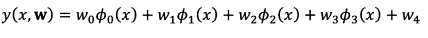

위 식과 같이 되고, $w_4$ 의 경우 Φ가 붙어 있지 않은데, y절편이라고 생각하면 된다. 그래서 항상 1을 출력하는 더미 기초함수를 표현할 수 있다.

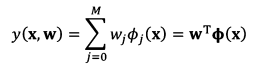

위와 같이 깔끔하게 표시할 수 있고, 아래는 이를 평균 제곱 오차에 넣은 식이 된다.

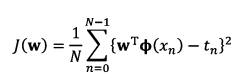

위의 식이 이전까지의 선형 모델의 평균 제곱 오차와 다른 것은 $X_n$이 Φ를 거친 값으로 되었다는 것을 제외하면 다를게 없다.

선형기저 함수의 특징은 다음과 같다.
1. '전처리'로 1차원 데이터를 M차원의 데이터 벡터로 변환한다.
2. M차원 입력 $X_n$에 대해 선형 회귀 모델을 적용한다.

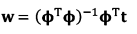

선형 기저 함수 모델은 Φ를 $X_n$으로 바꾸면 원래 선형 방정식의 최적해를 찾는 것과 다를바 없다.

당연히 전처리 후 함수는 아래 사진과 같이 Φ를 거친 함수값들의 행렬로 바뀌게 된다.

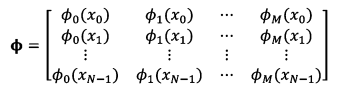

현재 X는 1차원이지만, 이는 다차원 입력 **X** 에 대해서도 그대로 확장할 수 있어, x를 **X**로 바꿔도 상관없다.

In [ ]:
def gauss_func(w, x):
  m = len(w) - 1
  mu = np.linspace(5, 30, m)
  s = mu[1] - mu[0]
  y = np.zeros_like(x)
  for j in range(m):
    y = y + w[j] * gauss(x, mu[j], s)
  y = y + w[m]
  return y

In [ ]:
def mse_gauss_func(x, t, w):
  y = gauss_func(w, x)
  mse = np.mean((y-t)**2)
  return mse

In [ ]:
def fit_gauss_func(x, t, m):
  mu = np.linspace(5, 30, m)
  s = mu[1] - mu[0] #위에서 설명했든 표준편차는 각 가우스 함수의 위치 차이로 한다.
  n = x.shape[0]
  psi = np.ones((n, m+1))
  for j in range(m):
    psi[:, j] = gauss(x, mu[j], s)
  psi_T = np.transpose(psi)

  b = np.linalg.inv(psi.T.dot(psi))
  c = b.dot(psi_T)
  w = c.dot(t)
  return w

W=[29.4 75.7  2.9 98.3 54.9]
SD = 3.98 cm


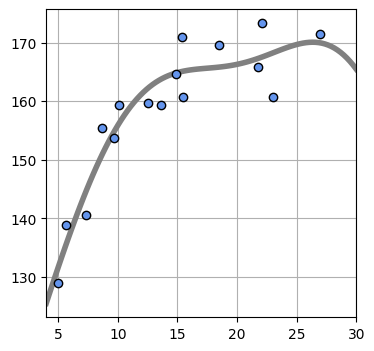

In [ ]:
def show_gauss_func(w):
  xb = np.linspace(X_min, X_max, 100)
  y = gauss_func(w, xb)
  plt.plot(xb, y, c=[.5,.5,.5], lw = 4)

plt.figure(figsize = (4, 4))
M = 4
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print('W=' + str(np.round(W, 1)))
print("SD = {0:.2f} cm".format(np.sqrt(mse)))
plt.show()

SD는 3.98로 직선 모델 때의 오차 7.00 보다 훨씬 줄어들었다.

# **5.5 오버피팅의 문제**

굽어 있는 문제도 기저함수를 이용해 잘 표현할 수 있을 것 같지만, 또, 문제가 있는데, 기저 함수의 갯수 M은 어떻게 정해야 할까? 라는 문제가 있다. M을 크게만 하면, 무조건 잘 나타내질까?

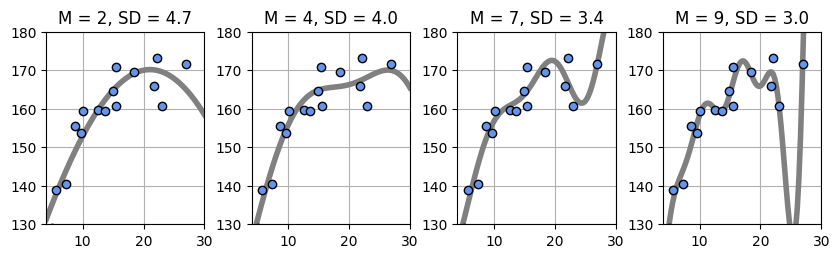

In [ ]:
plt.figure(figsize = (10, 2.5))
plt.subplots_adjust(wspace = 0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
  plt.subplot(1, len(M), i+1)
  W = fit_gauss_func(X, T, M[i])
  show_gauss_func(W)
  plt.plot(X, T, marker = 'o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black')
  plt.xlim(X_min, X_max)
  plt.grid(True)
  plt.ylim(130, 180)
  mse = mse_gauss_func(X, T, W)
  plt.title("M = {0:d}, SD = {1:.1f}".format(M[i], np.sqrt(mse)))
plt.show();

위의 예시처럼, 표준편차는 계속해서 줄어들지만, 새로운 입력에 대해 더 잘 예측할지는 의문이 되게 되었다.

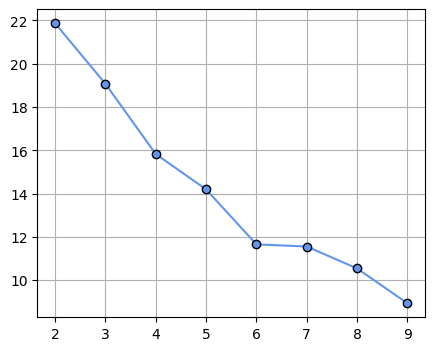

In [ ]:
plt.figure(figsize = (5, 4))
M = range(2, 10)
mse2 = np.zeros(len(M))
for i in range(len(M)):
  W = fit_gauss_func(X, T, M[i])
  mse2[i] = mse_gauss_func(X, T, W)
plt.plot(M, mse2, marker = 'o', color = 'cornflowerblue', markeredgecolor = 'black')
plt.grid(True)
plt.show()

정량 적인 수치로, M의 값이 증가함에 따라 SD는 감소하고 있다. 점이 없는 곳은 전혀 관련이 없지만, 점이 있는 곳은 억지로 가늘고 뾰족한 데이터 점에 가까워 지려고 하여, 데이터 점이 없는 곳에서는 뒤틀려버리는 현상이 일어날 수 있는데, 이를 오버피팅이라고 합니다. 최적의 M을 찾는데 MSE 를 사용할 수는 없습니다.초심으로 돌아가, 새 데이터의 예측도에 대해 평가해보자, 예를 들어 데이터 X와 t의 $\frac{1}{4}$ 정도를 test_data로 사용해서, 이 test_data에 대한 예측도를 평가해보자. 즉 훈련에 사용하지 안은 데이터들에 대한 예측 오차로 M을 평가해 보자는 것이다. 이 방법을 Holdout 검증이라고 한다.

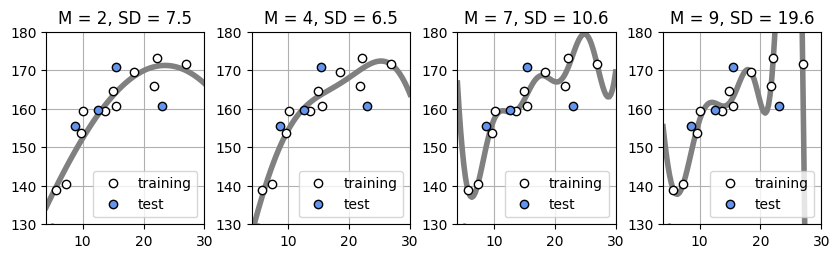

In [ ]:
X_test = X[:int(X_n / 4 + 1)]
T_test = T[:int(X_n / 4 + 1)]
X_train = X[int(X_n / 4 + 1):]
T_train = T[int(X_n / 4 + 1):]

plt.figure(figsize = (10, 2.5))
plt.subplots_adjust(wspace = 0.3)
M = [2, 4, 7, 9]
for i in range(len(M)):
  plt.subplot(1, len(M), i+1)
  W = fit_gauss_func(X_train, T_train, M[i])
  show_gauss_func(W)
  plt.plot(X_train, T_train, marker = 'o', linestyle = 'None', color = 'white', markeredgecolor = 'black', label = 'training')
  plt.plot(X_test, T_test, marker = 'o', linestyle = 'None', color = 'cornflowerblue', markeredgecolor = 'black', label = 'test')
  plt.legend(loc = 'lower right', fontsize = 10, numpoints = 1)
  plt.xlim(X_min, X_max)
  plt.ylim(130, 180)
  plt.grid(True)
  mse = mse_gauss_func(X_test, T_test, W)
  plt.title("M = {0:d}, SD = {1:.1f}".format(M[i], np.sqrt(mse)))
plt.show()

확실히 test_data에 대해서는 점점 더 잘 fitting 하고 있지만, test data에 대해서는 점점 멀어지는 것을 SD 값을 통해 볼 수 있다.

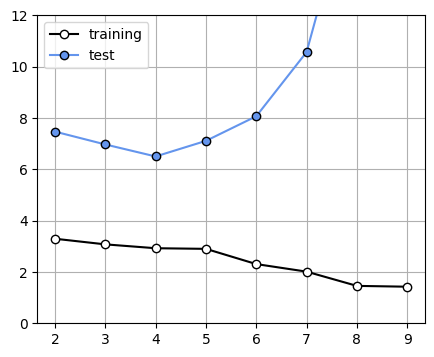

In [ ]:
plt.figure(figsize=(5, 4))
M = range(2, 10)
mse_train = np.zeros(len(M))
mse_test = np.zeros(len(M))
for i in range(len(M)):
    W = fit_gauss_func(X_train, T_train, M[i])
    mse_train[i] = np.sqrt(mse_gauss_func(X_train, T_train, W))
    mse_test[i] = np.sqrt(mse_gauss_func(X_test, T_test, W))
plt.plot(M, mse_train, marker='o', linestyle='-', markerfacecolor='white', markeredgecolor='black', color='black', label='training')
plt.plot(M, mse_test, marker='o', linestyle='-', color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 12)
plt.grid(True)
plt.show()


M = 4일 때, 과적합을 가장 잘 피하는 것으로 보인다.

위 예제처럼 데이터 셋이 적을 때는 테스트 데이터를 어떤 데이터 점을 골랐냐에 따라 값이 매우 크게 변동될 수 있다. 따라서, 이런 문제를 피하기 위해 ford-validation을 사용하기도 하는데, 데이터 셋을 일정 크기로 분할하고, 매번 train_data와 test_data를 바꿔가면서, 학습시키는 방법이다. 이렇게 K회 반복한 후, 마지막에 K개의 평균 제곱 오차의 평균값을 계산하여, M의 평가값으로 취하는 것을 k-ford-cross-validation 이라고 한다.

In [ ]:
def kfold_gauss_func(x, t, m, k):
  n = x.shape[0]
  mse_train = np.zeros(k)
  mse_test = np.zeros(k)
  for i in range(0, k):
    x_train = x[np.fmod(range(n), k) != i]
    t_train = t[np.fmod(range(n), k) != i]
    x_test = x[np.fmod(range(n), k) == i]
    t_test = t[np.fmod(range(n), k) == i]
    wm = fit_gauss_func(x_train, t_train, m)
    mse_train[i] = mse_gauss_func(x_train, t_train, wm)
    mse_test[i] = mse_gauss_func(x_test, t_test, wm)
  return mse_train, mse_test

np.fmod() 는 n을 k로 나눈 나머지를 출력한다.

In [ ]:
np.fmod(range(10), 5) #결국 총 10개의 원소를 얻을 수 있게 된다는 점.

array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4])

In [ ]:
M = 4
K = 4
kfold_gauss_func(X, T, M, K)

(array([12.87927851,  9.81768697, 17.2615696 , 12.92270498]),
 array([ 39.65348229, 734.70782018,  18.30921743,  47.52459642]))

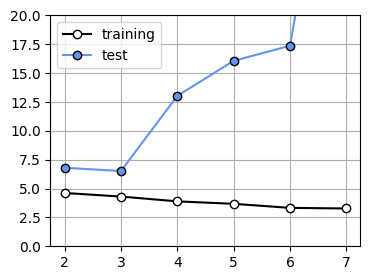

In [ ]:
M = range(2, 8)
K = 16
Cv_Gauss_train = np.zeros((K, len(M)))
Cv_Gauss_test = np.zeros((K, len(M)))
for i in range(0, len(M)):
    Cv_Gauss_train[:, i], Cv_Gauss_test[:, i] =\
                    kfold_gauss_func(X, T, M[i], K)
mean_Gauss_train = np.sqrt(np.mean(Cv_Gauss_train, axis=0))
mean_Gauss_test = np.sqrt(np.mean(Cv_Gauss_test, axis=0))


plt.figure(figsize=(4, 3))
plt.plot(M, mean_Gauss_train, marker='o', linestyle='-',
         color='k', markerfacecolor='w', label='training')
plt.plot(M, mean_Gauss_test, marker='o', linestyle='-',
         color='cornflowerblue', markeredgecolor='black', label='test')
plt.legend(loc='upper left', fontsize=10)
plt.ylim(0, 20)
plt.grid(True)
plt.show()

LOOCV(test_data_set을 1개로 하는 것)에서는 M=3이 가장 적합하다는 결론이 나왔습니다. 이 결과는 홀드 아웃 검증과는 다르지만, 그보다 신뢰할 수 있는 결과라고 할 수 있다.

교차 검증은 언제까지나 모델을 평가하기위한 지표지 weight를 구하기 위한 지표가 아니라는 것을 알고, weight는 다른 방식으로 구해야 한다.

SD=4.37 cm


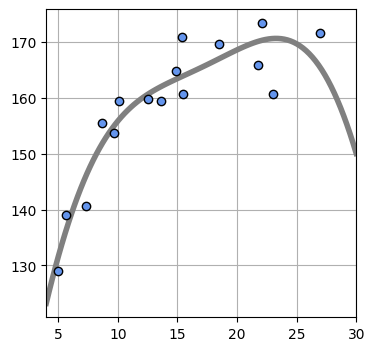

In [ ]:
M = 3
plt.figure(figsize=(4, 4))
W = fit_gauss_func(X, T, M)
show_gauss_func(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue', markeredgecolor='black')
plt.xlim([X_min, X_max])
plt.grid(True)
mse = mse_gauss_func(X, T, W)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()

데이터 셋이 작은 경우에는 cross-validation이 효과적일 수 있지만, 데이터 수가 많은 경우에는 현실적으로 훈련 자원 및 시간이 너무 많이 들기 때문에, 잘 사용하지 않는다. 즉 데이터 수가 많으면, 교차 검증과 홀드 아웃 검증의 결과가 크게 차이나지 않게 된다.

# **5.6 새로운 모델의 생성**

25세에 급격히 내려간다는 문제가 있다. 그 이유는 30세 주위의 데이터가 충분하지 않았기 때문인데, 이를 해결하기 위해 키는 나이가 들면서 점차 커지고, 일정한 곳에서 수렴한다는 가정을 추가해보자.

Screenshot from 2024-07-09 16-18-28.png

위와 같은 식을 써서 해결 할 수 있다. 이함수를 modelA 라고 부르자 X가 증가하면, $exp(-w_2x)$ 는 0에 접근하게 디고, 그 결과 1항의 $w_0$ 값 만을 갖게 된다. 즉 x가 증가시 y는 $w_0$에 가까워지게 된다.

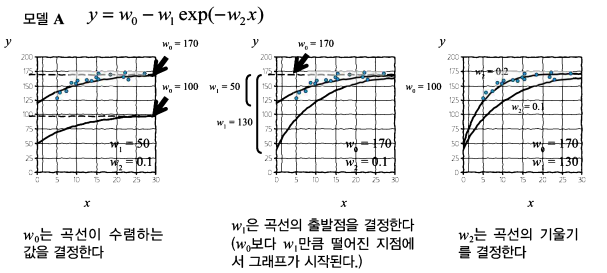

위의 그림을 보면 이해가 쉽다. 자 이제 마찬가지로 최적의 $w_0, w_1, w_2$ 를 구해보자, J를 사용해서 구하면 되며, 지금부터는 scipy의 minimize 함수를 통해 구현해보겠다.

In [ ]:
# 모델 A -----------------------------------
def model_A(x, w):
    y = w[0] - w[1] * np.exp(-w[2] * x)
    return y


# 모델 A 표시 -------------------------------
def show_model_A(w):
    xb = np.linspace(X_min, X_max, 100)
    y = model_A(xb, w)
    plt.plot(xb, y, c=[.5, .5, .5], lw=4)


# 모델 A의 MSE ------------------------------
def mse_model_A(w, x, t):
    y = model_A(x, w)
    mse = np.mean((y - t)**2)
    return mse

In [ ]:
from scipy.optimize import minimize


# 모델 A의 매개 변수 최적화 -----------------
def fit_model_A(w_init, x, t):
    res1 = minimize(mse_model_A, w_init, args=(x, t), method="powell")
    return res1.x

w0=169.0, w1=113.7, w2=0.2
SD=3.86 cm


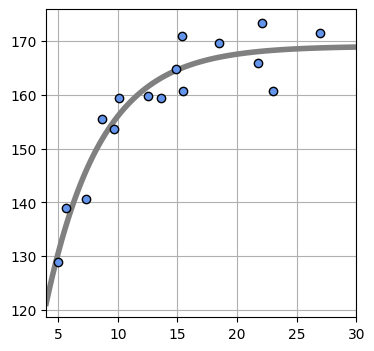

In [ ]:
# 메인 ------------------------------------
plt.figure(figsize=(4, 4))
W_init=[100, 0, 0]
W = fit_model_A(W_init, X, T)
print("w0={0:.1f}, w1={1:.1f}, w2={2:.1f}".format(W[0], W[1], W[2]))
show_model_A(W)
plt.plot(X, T, marker='o', linestyle='None',
         color='cornflowerblue',markeredgecolor='black')
plt.xlim(X_min, X_max)
plt.grid(True)
mse = mse_model_A(W, X, T)
print("SD={0:.2f} cm".format(np.sqrt(mse)))
plt.show()


그래프가 나이가 들면서 동시에 키가 커지면 일정 값에 수렴한다는 그럴듯한 형태가 되었다.

# **5.7 모델의 선택**



Gauss(M=3) SD=6.51 cm
Model A SD=4.72 cm


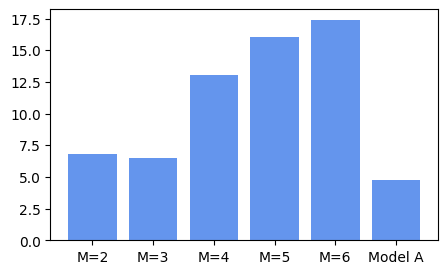

In [ ]:
# 교차 검증 model_A
def kfold_model_A(x, t, k):
    n = len(x)
    mse_train = np.zeros(k)
    mse_test = np.zeros(k)
    for i in range(0, k):
        x_train = x[np.fmod(range(n), k) != i]
        t_train = t[np.fmod(range(n), k) != i]
        x_test = x[np.fmod(range(n), k) == i]
        t_test = t[np.fmod(range(n), k) == i]
        wm = fit_model_A(np.array([169, 113, 0.2]), x_train, t_train)
        mse_train[i] = mse_model_A(wm, x_train, t_train)
        mse_test[i] = mse_model_A(wm, x_test, t_test)
    return mse_train, mse_test


# 메인
K = 16
Cv_A_train, Cv_A_test = kfold_model_A(X, T, K)
mean_A_test = np.sqrt(np.mean(Cv_A_test))
print("Gauss(M=3) SD={0:.2f} cm".format(mean_Gauss_test[1]))
print("Model A SD={0:.2f} cm".format(mean_A_test))
SD = np.append(mean_Gauss_test[0:5], mean_A_test)
M = range(6)
label = ["M=2", "M=3", "M=4", "M=5", "M=6", "Model A"]
plt.figure(figsize=(5, 3))
plt.bar(M, SD, tick_label=label, align="center",
facecolor="cornflowerblue")
plt.show()


선형 기저 함수 모델을 보면, M의 변화에 따라 변하면, modelA와 비교해보면 된다. LOOCV결과와 비교해보며느 M = 3 일 때 보다도 ModelA가 더 좋다.

# **5.8 정리**

5장에서 지도 학습의 회귀 문제의 해결법을 대략적으로 알게 되었지만, 아래표로 정리한다.

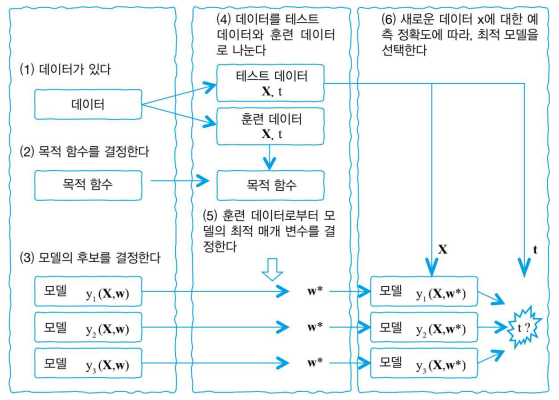